# Split datasets


## Split into training, validation, and test datasets.
### a,b,c are split into train, val, and test in uniform proportions.

In [3]:
## data copy
import os
from os import listdir
from os.path import isfile, join

import shutil
import random

In [4]:
def get_filelist(file_dir):
    """
    Get a list of files in a path.
    Args:
        file_dir: dataset path
    Returns:
        file_names: list of filenames the dataset path
    """
    included_extensions = ['jpg','jpeg', 'bmp', 'png', 'gif']

    file_names = [fn for fn in os.listdir(file_dir)
                  if any(fn.lower().endswith(ext) for ext in included_extensions)]
    print("Number of file_names: ", len(file_names))
    return file_names

def create_dir(dir_name):
    """Creating directory
    Args:
        dir_name: directory name
    """
    if os.path.isdir(dir_name)==False:
        os.makedirs(dir_name)
        print("create directory: ", dir_name)
        
def data_split(data_dict, train_rat=0.7, val_rat=0.2, test_rat=0.1):
    """
    Data separation by train,val,test. Consider the data distribution.
    Args:
        data_dict: Full dataset dictionary.
        train_rat: training data rate.
        val_rat: validation data rate.
        test_rat: test data rate. Not used but for verification.
    Retruns:
        sep_dict: Data dictionary separated by input rate.
    
    """
    if round(train_rat + val_rat + test_rat,2)!=1:
        print("Please check the data rate. train: {}, val: {}, test: {}".format(train_rat, val_rat, test_rat))

    sep_dict = {"train":{}, "val":{}, "test":{}}
    random.seed(4)
    for k in data_dict.keys():
        data_dict[k].sort(reverse=False)
        random.shuffle(data_dict[k])

        num_data = len(data_dict[k])
        num_train = int(num_data*train_rat)
        num_val = num_train+int(num_data*val_rat)
        #num_test = num_data - num_train - num_val

        sep_dict["train"][k] = data_dict[k][:num_train]
        sep_dict["val"][k] = data_dict[k][num_train:num_val]
        sep_dict["test"][k] = data_dict[k][num_val:]
        
    print("separation complete!")  
    
    return sep_dict

def copy_org_2_new(sep_dict, org_data_dir, new_data_dir, overwrite_op = False):
    """
    Copy to new dataset path.
    Args:
        sep_dict: Separation dataset dictionary
        org_data_dir: Existing dataset path.
        new_data_dir: New dataset path.
        overwrite_op: File Overwrite Options
    """
    
    # data (train, val, test)
    for d_type in ["val","train","test"]:
        d_type_dir = join(new_data_dir, d_type)

        # class (a0, b1, c1, bc1)
        for c_type in sep_dict[d_type]:
            c_type_dir = join(d_type_dir, c_type)
            create_dir(c_type_dir) 

            img_path_list = sep_dict[d_type][c_type]
            for img_path in img_path_list:
                org_img_path = join(org_data_dir, img_path)
                new_img_path = join(c_type_dir, img_path)
                if overwrite_op==True:
                    if os.path.isfile(fname)==False:
                        shutil.copy(org_img_path, new_img_path)
                else:
                    shutil.copy(org_img_path, new_img_path)
                    
    print("copy complete!")
    
def set_dict_occluded_face_dataset(file_names):
    """
    Classify occluded_face_dataset into a,b,c values and make it into a dictionary.
    Args:
        file_names: image path(image file name) in dataset
    Returns:
        data_dict: Dictionary classified as a,b,c.
    """
    # a_b_cxxxxx.extension
    abc_dict = {0:"a", 2:"b", 4:"c"}

    # 0: Non-occluded, 1: Occluded
    data_dict = {"a0":[], "b1":[], "c1":[], "bc1":[]}
    for i, file_name in enumerate(file_names):

        b_sum = 0
        c_sum = 0

        for j in abc_dict.keys():
            fnj = file_name[j] 
            if fnj.isdigit()==False:
                break

            if abc_dict[j]=="a":
                if int(fnj)==0:
                    break

            elif abc_dict[j]=="b":
                if int(fnj)==1:
                    b_sum+=1

            elif abc_dict[j]=="c":
                if int(fnj)==1:
                    c_sum+=1

        if b_sum>0 and c_sum==0:
            data_dict["b1"].append(file_name)
        elif b_sum==0 and c_sum>0:
            data_dict["c1"].append(file_name)
        elif b_sum>0 and c_sum>0:
            data_dict["bc1"].append(file_name)
        else:
            data_dict["a0"].append(file_name)
    return data_dict

def split_dataset_and_copy(data_dir, cp_data_dir, file_names, 
                           train_rat=0.7, 
                           val_rat=0.2, 
                           test_rat=0.1, 
                           overwrite_op = False):
    """
    split into train, validation and testing. And copy the file to the cp_data_dir.
    Args:
        data_dir: dataset before copy.
        cp_data_dir: dataset after copy.
        file_names: List of file names before copying.
        train_rat: training data rate.
        val_rat: validation data rate.
        test_rat: test data rate. Not used but for verification.
        overwrite_op: File Overwrite Options
    """

    num_data = len(file_names)
    num_train = int(num_data*train_rat)
    num_val = num_train+int(num_data*val_rat)

    split_dict = {}
    split_dict["train"] = file_names[:num_train]
    split_dict["val"] = file_names[num_train:num_val]
    split_dict["test"] = file_names[num_val:]

    for key_name in split_dict.keys():
        for file_name in split_dict[key_name]:
            org_file_path = join(data_dir,file_name)
            
            cp_data_dir_bg = join(cp_data_dir, key_name, "bg")
            create_dir(cp_data_dir_bg)
            
            cp_file_path = join(cp_data_dir_bg, file_name)
            #print(org_file_path, cp_file_path)
            if overwrite_op==True:
                if os.path.isfile(fname)==False:
                    shutil.copy(org_file_path, cp_file_path)
            else:
                shutil.copy(org_file_path, cp_file_path)
                    
    print("copy complete!")

In [5]:
root_dir = "/Users/username/Project/Non_occluded_face_net"

In [7]:
org_data_dir = "{}/new_train_3".format(root_dir)
new_data_dir = "{}/face_datasets_4".format(root_dir)

file_names = get_filelist(org_data_dir)

data_dict = set_dict_occluded_face_dataset(file_names)
sep_dict = data_split(data_dict, train_rat=0.7, val_rat=0.2, test_rat=0.1)
copy_org_2_new(sep_dict, org_data_dir, new_data_dir, overwrite_op = False)

Number of file_names:  15301
separation complete!
create directory:  /Users/hy_mac/Project/kakaopay/face_datasets_4/val/a0
create directory:  /Users/hy_mac/Project/kakaopay/face_datasets_4/val/b1
create directory:  /Users/hy_mac/Project/kakaopay/face_datasets_4/val/c1
create directory:  /Users/hy_mac/Project/kakaopay/face_datasets_4/val/bc1
create directory:  /Users/hy_mac/Project/kakaopay/face_datasets_4/train/a0
create directory:  /Users/hy_mac/Project/kakaopay/face_datasets_4/train/b1
create directory:  /Users/hy_mac/Project/kakaopay/face_datasets_4/train/c1
create directory:  /Users/hy_mac/Project/kakaopay/face_datasets_4/train/bc1
create directory:  /Users/hy_mac/Project/kakaopay/face_datasets_4/test/a0
create directory:  /Users/hy_mac/Project/kakaopay/face_datasets_4/test/b1
create directory:  /Users/hy_mac/Project/kakaopay/face_datasets_4/test/c1
create directory:  /Users/hy_mac/Project/kakaopay/face_datasets_4/test/bc1
copy complete!


---
## Adding background dataset

In [6]:
bg_data_dir = "{}/background_4".format(root_dir)
bg_file_names = get_filelist(bg_data_dir)

Number of file_names:  3030


In [7]:
cp_data_dir = "{}/face_datasets_4".format(root_dir)
split_dataset_and_copy(bg_data_dir, cp_data_dir, bg_file_names, train_rat=0.7, val_rat=0.2, test_rat=0.1)

copy complete!


---
## View dataset

In [11]:
import numpy as np
# import cv2

import PIL
import PIL.Image

import tensorflow as tf
import tensorflow_datasets as tfds

import pathlib



In [12]:
data_dir = new_data_dir
cpt = sum([len(files) for r, d, files in os.walk(data_dir)])
print("Number of data: ", cpt)

data_dir2 = pathlib.Path(data_dir)

Number of data:  15567


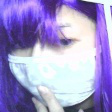

In [13]:
# show train image 
train_sample=list(data_dir2.glob('train/*/*'))
PIL.Image.open(str(train_sample[0]))

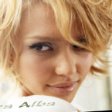

In [14]:
# show validation image 
val_sample=list(data_dir2.glob('val/*/*'))
PIL.Image.open(str(val_sample[0]))

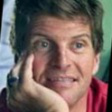

In [15]:
# show test image 
test_sample=list(data_dir2.glob('test/*/*'))
PIL.Image.open(str(test_sample[0]))